## Reading tabular data into pandas dataframes

Pandas provides a variety of functions for reading data tables into DataFrame objects, and for writing those DataFrames out to files in different formats.

Let's start by doing a few imports.  Execute the code cell below.

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Let's look at the contents of the current directory with the ```%ls``` magic function.  Execute the code cell below.

In [129]:
%ls

gradebook.db                      jn.py            ReadPandas.ipynb
IthacaDailyClimate2018.csv        __pycache__/
IthacaDailyClimateMultiyear.xlsx  readPandas1.png


Data tables are often stored in csv (comma-separated values) files.  This is a useful file format, since it is human-readable and is portable across different programs and platforms.

In our current working directory, there is a data file named "IthacaDailyClimate2018.csv", which contains climate data for Ithaca, NY, USA for each day throughout 2018.

In the code cell below, use the ```read_csv``` function in pandas to create a dataframe from this csv file, and assigns the resulting dataframe to the variable ```df```.  Then uses the ```head``` method to show the first five rows of the dataframe.  Execute the code cell below and evaluate the result.

Consult the <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html'>online documentation</a> for more information about the ``read_csv`` function.

## Graded Cell

In [130]:
df = pd.read_csv('IthacaDailyClimate2018.csv')
df

,Date,Maximum Temperature,Minimum Temperature,Average Temperature,Precipitation,Snowfall,Snow Depth
0,2018-01-01,5,0,2.5,0.04,1.0,3.0
1,2018-01-02,13,1,7.0,0.03,0.6,4.0
2,2018-01-03,19,-2,8.5,0.00,0.0,4.0
3,2018-01-04,22,1,11.5,0.00,0.0,3.0
4,2018-01-05,18,-2,8.0,0.09,1.2,4.0
...,...,...,...,...,...,...,...
360,2018-12-27,33,23,28.0,0.00,0.0,1.0
361,2018-12-28,40,21,30.5,0.07,0.0,0.0
362,2018-12-29,50,37,43.5,0.04,0.0,0.0
363,2018-12-30,37,24,30.5,0.02,0.7,1.0


## Self-Check

Run the cell below to test the correctness of your code in the cell above.

In [131]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testDf

try:
    print(testDf(df))    
except Exception as e:
    print("Error!\n" + str(e))

Correct!


It's also useful to get an overview of a dataframe by calling the ```info``` method of the dataframe.  Use the `info` method on the dataframe in the code cell below to print out this summary information. Evaluate the results.

In [132]:
df.info

<bound method DataFrame.info of            Date  Maximum Temperature  Minimum Temperature  \
0    2018-01-01                    5                    0   
1    2018-01-02                   13                    1   
2    2018-01-03                   19                   -2   
3    2018-01-04                   22                    1   
4    2018-01-05                   18                   -2   
..          ...                  ...                  ...   
360  2018-12-27                   33                   23   
361  2018-12-28                   40                   21   
362  2018-12-29                   50                   37   
363  2018-12-30                   37                   24   
364  2018-12-31                   35                   25   

     Average Temperature  Precipitation  Snowfall  Snow Depth  
0                    2.5           0.04       1.0         3.0  
1                    7.0           0.03       0.6         4.0  
2                    8.5           0.00    

The information printed above reveals that some of the data fields are integers (int64), some are floats (float64), and the ```Date``` field is represented as an "object".  That essentially means that it is being treated as a string, and not recognized to be a date (or datetime) object.

We can refine our call above to ```pd.read_csv``` to provide additional information that the ```Date``` field should be interpreted as a date.  ```pd.read_csv``` has an option called ```parse_dates```.  Use the ```parse_dates``` option and assign it a list containing column names (as strings); pandas will try to parse those columns as datetime objects.

In the code cell below, write a revised expression to read the climate csv file and assign the result to ```df```, except this time provide additional information that the ```Date``` column should be parsed as dates.  Then write an expression to print out the summary information using the ```info``` method.  Evaluate the code cell.

## Graded Cell

In [133]:
df = pd.read_csv('IthacaDailyClimate2018.csv' , parse_dates=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 365 non-null    datetime64[ns]
 1   Maximum Temperature  365 non-null    int64         
 2   Minimum Temperature  365 non-null    int64         
 3   Average Temperature  365 non-null    float64       
 4   Precipitation        365 non-null    float64       
 5   Snowfall             365 non-null    float64       
 6   Snow Depth           365 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 20.1 KB


## Self-Check

Run the cell below to test the correctness of your code in the cell above.

In [134]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testdDfDate

try:
    print(testdDfDate(df))    
except Exception as e:
    print("Error!\n" + str(e))

Correct!


Now that the ```Date``` field has been converted to a datetime64 object, pandas is able to do some useful things with that.  Recall that a dataframe object has a ```plot``` method that allows you to plot different columns against each other, by passing the names of those columns as ```x``` and ```y``` inputs to the method.

In the code cell below, make a call to ```df.plot``` that plots the ```Snow Depth``` throughout the year (i.e., with ```Snow Depth``` on the y-axis and ```Date``` on the x-axis).  Evaluate your plot.  You should notice in the plot that the ticks on the x axis are represented as abbreviations of the months, even though those month abbreviations were not included in the original csv file that we read in.  Because we converted the dates in the previous step, pandas was able to make use of that information to make a usefully formatted plot.

## Graded Cell

<i>Note: a self-check will not accompany this assignment.</i><br>
Your plot should look like this: <br><img src="readPandas1.png" width=400 height=400  align="left"/>

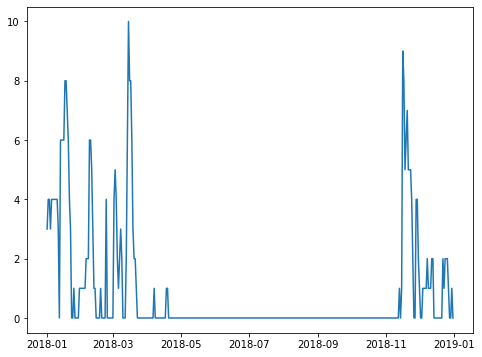

In [135]:
df = pd.read_csv("IthacaDailyClimate2018.csv",parse_dates=['Date'])
plt.figure(figsize = (8,6))
plt.plot(df['Date'],df['Snow Depth'],label="Snow Depth")
plt.show()




Similar to the ```read_csv``` function, pandas also provides a ```read_excel``` function to read tabular data from an Excel spreadsheet into a dataframe.

One feature that distinguishes a csv file from an Excel file is that the latter can contain multiple worksheets. You might be interested in reading in only one worksheet, or you might want to read in several or even all of them.  This is controlled by the ```sheet_name``` option that can be passed to ```read_excel```.

* if ```sheet_name``` is not specified, the first worksheet is read into a dataframe
* if ```sheet_name``` is specified along with the name of a worksheet (e.g., ```sheet_name="2016"```), then the worksheet with that name is read into a dataframe
* if ```sheet_name=None``` is specified, then all worksheets are read into dataframes, and the group is stored in a dictionary keyed on the names of each of the worksheets (technically, stored in an OrderedDict)

The file in your current working directory named "IthacaDailyClimateMultiyear.xlsx" is an Excel workbook containing two worksheets with daily climate data, one for the year 2016 and one for the year 2018.

In the code cell below, use the ```pd.read_excel``` along with the ```sheet_name``` option, to read the worksheet named "2016" into a dataframe named ```df16``` and the worksheet named "2018" into a dataframe named ```df18```.

Consult the <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html'>online documentation</a> for more information about the ``read_excel`` function.

## Graded Cell

In [136]:
df16 = pd.read_excel("IthacaDailyClimateMultiyear.xlsx", sheet_name="2016")
df18 = pd.read_excel("IthacaDailyClimateMultiyear.xlsx", sheet_name="2018")
snow16 = df16["Snowfall"].sum()
snow18 = df18["Snowfall"].sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 365 non-null    datetime64[ns]
 1   Maximum Temperature  365 non-null    int64         
 2   Minimum Temperature  365 non-null    int64         
 3   Average Temperature  365 non-null    float64       
 4   Precipitation        365 non-null    float64       
 5   Snowfall             365 non-null    float64       
 6   Snow Depth           365 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 20.1 KB


## Self-Check

Run the cell below to test the correctness of your code in the cell above.

In [137]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testdf16, testdf18

try:
    print(testdf16(df16))
except Exception as e:
    print("Error!\n" + str(e))

try:
    print(testdf18(df18))
except Exception as e:
    print("Error!\n" + str(e))

Correct!
Correct!


Using the ```sum``` method defined both for DataFrames and Series objects, compute the total amount of Snowfall in Ithaca during 2016, and store the result in the variable ```snow16```.  (Hint: you can either extract Snowfall first and compute the sum on the Series, or do the sum on the DataFrames and then extract the value for Snowfall.)  Do the same for 2018, storing the total amount of snowfall during that year in the variable ```snow18```.

## Graded Cell

In [140]:
import numpy as np
snowfall = df16['Snowfall']
snow16 = np.sum(snowfall)
snowfall = df18['Snowfall']
snow18 = np.sum(snowfall)

## Self-Check

Run the cell below to test the correctness of your code in the cell above.

In [141]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testSnow16, testSnow18

try:
    print(testSnow16(snow16, df16))
except Exception as e:
    print("Error!\n" + str(e))

try:
    print(testSnow18(snow18, df18))
except Exception as e:
    print("Error!\n" + str(e))

Correct!
snow16 contains the total amount of Snowfall in Ithaca during 2016.
Correct!
snow18 contains the total amount of Snowfall in Ithaca during 2018.


Inspect the values of <code>snow16</code> and <code>snow18</code>. Which year had more total snowfall?

In the code cell below, create the variable <code>MORE_SNOW</code> and assign it the value of "2016" or "2018" depending on which year had more total snowfall.  You might even want to write a little code in the cell below to set the value of that variable based on which snow total is greater.

## Graded Cell

In [142]:
MORE_SNOW = '2018'

## Self-Check

Run the cell below to test the correctness of your code in the cell above.

In [143]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testMoreSnow
try:
    print(testMoreSnow(MORE_SNOW))
except Exception as e:
    print("Error!\n" + str(e))


Correct!
